In [1]:
a = "purple is the best city in the forest".split()
b = "there is an art to getting you way and throwing bananas on to the street is not it".split()
c = "it is not often you find soggy bananas on the street".split()
d = "green should have smelled more tranquil but somehow it just tasted roten".split()
e = "joice enjoyed eating pancakes with ketchup".split()
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been cancelled"
g = "to get your way you must not bombard the road with yellow fruit".split()

In [2]:
import numpy as np
docs = [a, b, c]

def tfidf(word, sentence):
    freq = sentence.count(word)
    tf = freq / len(sentence)
    idf = np.log10(len(docs) / sum([1 for doc in docs if word in doc]))
    return round(tf*idf.item(), 4)

In [3]:
tfidf("forest", a)

0.0596

In [4]:
vocab = set(a+b+c)

In [5]:
vec_a = []
vec_b = []
vec_c = []
for word in vocab:
    vec_a.append(tfidf(word, a))
    vec_b.append(tfidf(word, b))
    vec_c.append(tfidf(word, c))

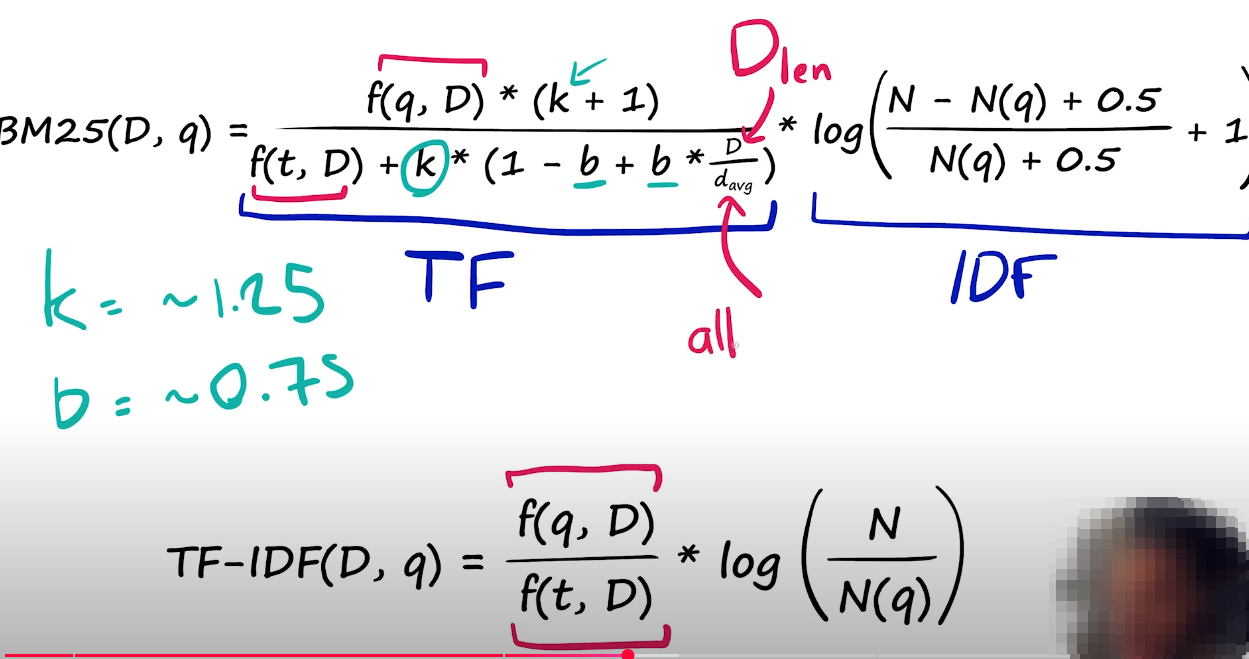

In [6]:
docs = [a, b, c, d, e, f]
N = len(docs)
avg_len = sum(len(doc) for doc in docs) / len(docs)
def bm25(word, sentence, k=1.2, b=0.75):
    freq = sentence.count(word)
    tf = (freq * (k+1)) / (freq + k * (1 - b + b * len(sentence)/avg_len))
    N_q = sum(1 for doc in docs if word in doc)
    idf = np.log((N - N_q + 0.5)/(N_q + 0.5) +  1)
    return round(tf*idf.item(), 4)

bm25('asteroid', f), bm25('purple', a)

(0.718, 2.1341)

In [7]:
from sentence_transformers import SentenceTransformer

a = "purple is the best city in the forest"
b = "there is an art to getting you way and throwing bananas on to the street is not it"
c = "it is not often you find soggy bananas on the street"
d = "green should have smelled more tranquil but somehow it just tasted roten"
e = "joice enjoyed eating pancakes with ketchup"
f = "as the asteroid hurtled toward earth becky was upset her dentist appointment had been cancelled"
g = "to get your way you must not bombard the road with yellow fruit"


model = SentenceTransformer("bert-base-nli-mean-tokens")
sentence_embeddings = model.encode([a, b, c, d, e, f, g])

In [12]:
from sklearn.metrics.pairwise import cosine_similarity

scores = np.zeros(shape = (sentence_embeddings.shape[0], sentence_embeddings.shape[0]))

for i in range(sentence_embeddings.shape[0]):
    scores[i, :] = cosine_similarity([sentence_embeddings[i]], sentence_embeddings)[0]

<Axes: >

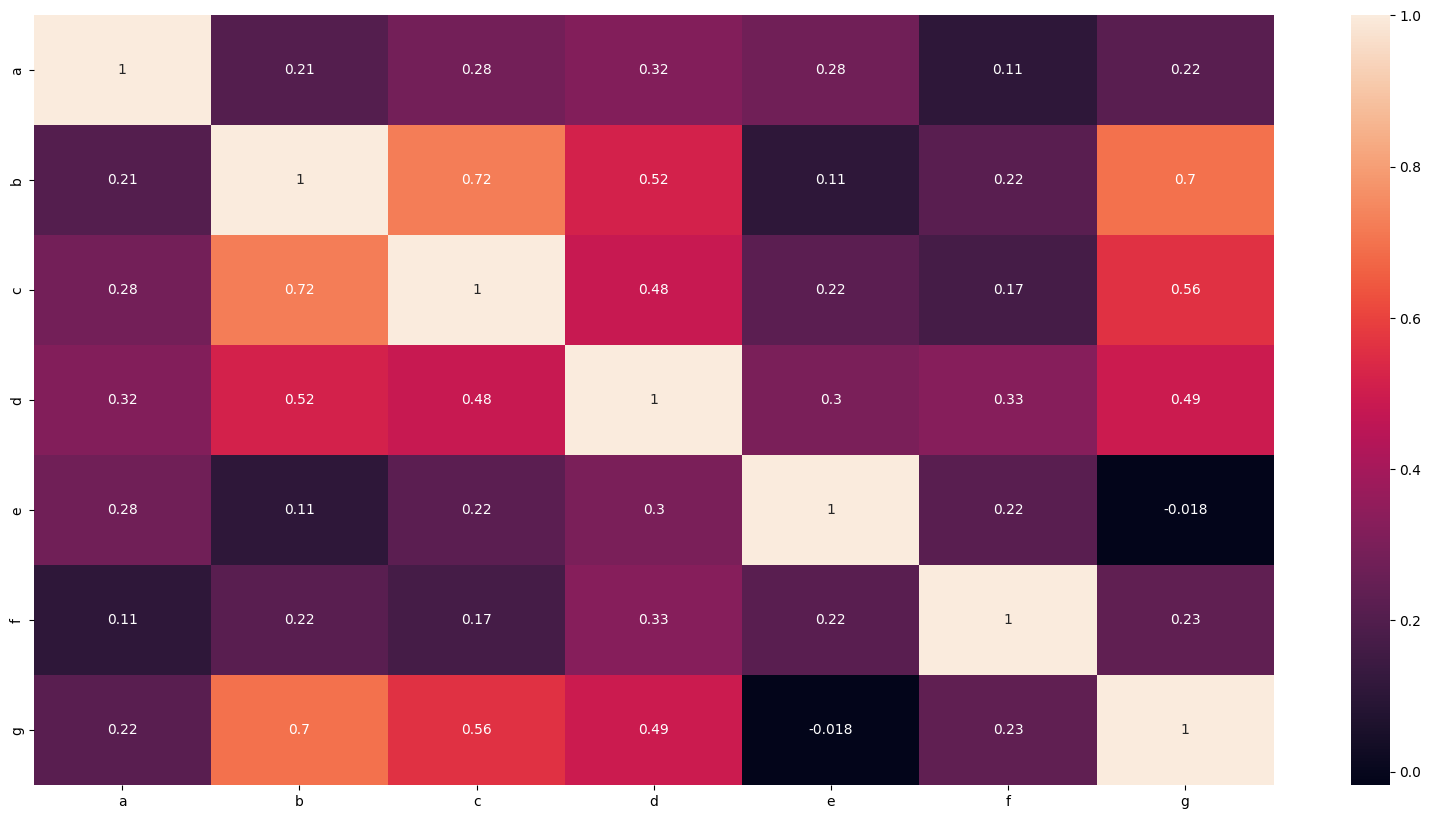

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
sns.heatmap(scores, xticklabels=labels, yticklabels=labels, annot=True)